In [ ]:
# The code was removed by Watson Studio for sharing.

**Churn rate Data Visualizations**

This notebook project uses the `employee_churn_trimmed.csv` which contains data on employees who quit or stayed at their jobs, to uncover what could be causing churn and thus present these insights and findings using matplotlib and seaborn visualization plots. 

The Employee data includes:

*   `Age`
*   `Attrition`: y variable - *Churned,Stayed*
*   `DistanceFromHome`: in Km
*   `EducationField`:  *('Bellow College', 'College', 'Bachelor's degree', 'Master's degree', 'PhD'). *
*  `MonthlyIncome` : *in USD* 
*  `Gender`: *Male,Female* 
*  `PercentSalaryHike`:* % increase in salary last year.*
*   `PerformanceRating`: *Rating of Employee Performance classified as either Low, Good, Great, Excellent*
*   `YearsAtCompany`: *Number of years spent at company*
*   `EnvironmentSatisfaction`: Rating of Employee Satisfaction with the work environment classified as *Low,Good,Great,Excellent*
*   `JobInvolvement`: Rating given by Employee in terms of Job Involvement classified as *Low, Good, Great, Excellent*
*   `RelationshipSatisfaction`: Rating of Employee Relationships Satisfaction classified as *Low, Good, Great, Excellent*
*   `WorklifeBalance`: Rating of Employee Work life balance Satisfaction classified as *Low, Good, Great, Excellent*






















In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
#Read the data into a dataframe
employee_churn = pd.read_csv('https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/employee_churned_trimmed.csv?raw=true', index_col = "Unnamed: 0")

In [3]:
#printing the header of the employee_churn dataframe
employee_churn.tail()

,Age,Attrition,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,WorkLifeBalance,YearsAtCompany
1465,36,Stayed,23,College,Medical,Great,Male,Excellent,Excellent,2571,17,Great,Great,80,Great,5
1466,39,Stayed,6,Below College,Medical,Excellent,Male,Good,Low,9991,15,Great,Low,80,Great,7
1467,27,Stayed,4,Bachelor's degree,Life Sciences,Good,Male,Excellent,Good,6142,20,Excellent,Good,80,Great,6
1468,49,Stayed,2,Bachelor's degree,Medical,Excellent,Male,Good,Good,5390,14,Great,Excellent,80,Good,9
1469,34,Stayed,8,Bachelor's degree,Medical,Good,Male,Excellent,Great,4404,12,Great,Low,80,Excellent,4


**Employee Base -> Age**
Here, to plot the distribution of one numerical variable ,Age, I used a distribution plot from seaborn to try understand how old is the employee base 

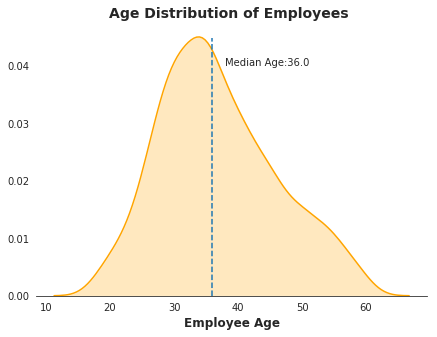

In [4]:
sns.set_style('white')
plt.figure(figsize=(7,5))
# Create plot
sns.distplot(employee_churn['Age'],color='orange',kde_kws={'shade':True},hist=False)
# Add vertical line
plt.axvline(employee_churn['Age'].median(),ymax=0.95,linestyle='--')
# Add median age of all employees
plt.text(employee_churn['Age'].median() + 2,0.04,'Median Age:'+str(employee_churn['Age'].median()))
# Despine plot
sns.despine(left=True)

plt.yticks()
plt.xlabel('Employee Age',fontsize=12,fontweight='semibold')
plt.title('Age Distribution of Employees ',fontsize=14,fontweight='semibold')
plt.show()

In the following, I try to visualize **what is the distribution of age, grouped by gender**  

In this plot, I plotted on a `figure`  with multiple subplots called `axes`.

A `figure` is divided into a grid of rows and columns, where each cell represents an `axes` object which can hold a subplot.

In [5]:
# Subset on males and compute their median age
male_churn = employee_churn[employee_churn['Gender'] == "Male"]
median_male_age = male_churn['Age'].median()

# Subset on females and compute their median age
female_churn = employee_churn[employee_churn['Gender'] == "Female"]
median_female_age = female_churn['Age'].median()

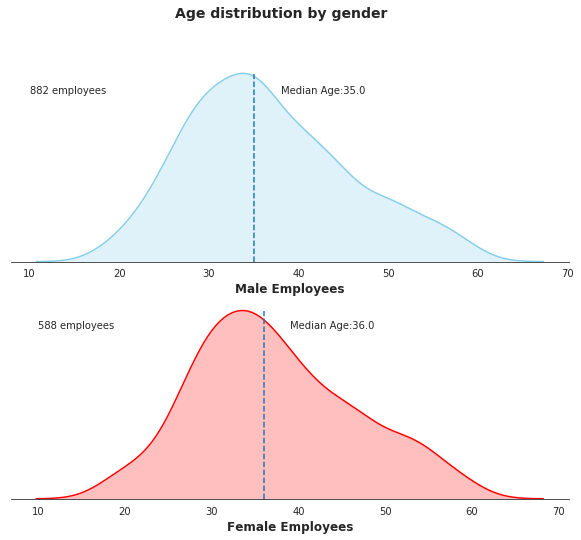

In [6]:
# Set initial plot options
sns.set_style('white')

# Create figure and axes
#The figure has two rows and 1 column
#I will plot each subplot/axes on each row
fig, axes = plt.subplots(2, 1,figsize=(10,8))

# Create plot of male age distribution on first axes
sns.distplot(male_churn['Age'], color='skyblue',kde_kws={'shade':True},hist=False,ax=axes[0])  

# Add vertical line and annotate median age for male employees on first axes
axes[0].axvline(median_male_age, ymax=0.95, linestyle = '--')
axes[0].text(median_male_age + 3,0.04 ,'Median Age:'+ str(median_male_age))
axes[0].text(10,0.04,str(male_churn.shape[0]) + ' employees')

# Add number of male employees for context
# Format subplot in first axes
axes[0].set_yticks([])
axes[0].set_xlabel('Male Employees',fontsize=12,fontweight='semibold')

# Create plot of female age distribution on second axes
sns.distplot(female_churn['Age'], color='red',kde_kws={'shade':True},hist=False,ax=axes[1])  

# Add vertical line and annotate median age for female employees on second axes
axes[1].axvline(median_female_age, ymax=0.95, linestyle = '--')
axes[1].text(median_female_age + 3,0.04 ,'Median Age:'+ str(median_female_age))

# Add number of female employees for context
axes[1].text(10,0.04,str(female_churn.shape[0]) + ' employees')
axes[1].set_yticks([])
axes[1].set_xlabel('Female Employees',fontsize=12,fontweight='semibold')
# Despine visualizations
sns.despine(left = True)
# Figure final formatting   
fig.suptitle('Age distribution by gender',fontsize=14,fontweight='semibold')
plt.show()

**Visualize education level of employees by gender**

I used seaborn's countplot to plot counts/distribution of the categorical variable, education level and ordered by Gender variables.




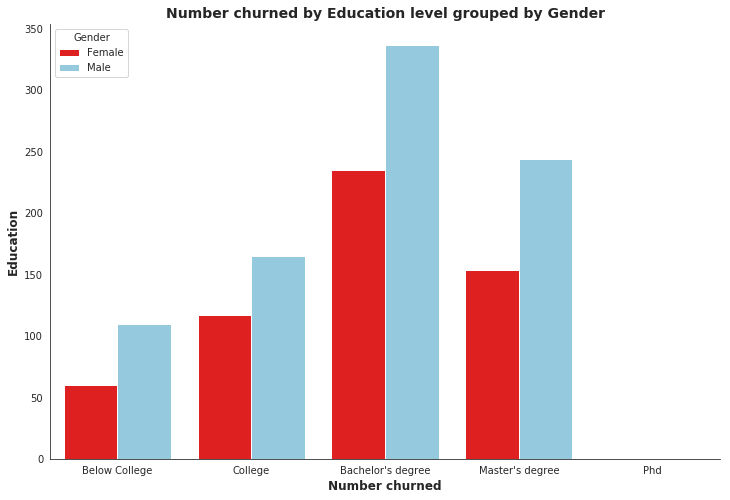

In [7]:
#Set initial plot options
sns.set_style('white')
plt.figure(figsize = (12, 8))

# Create a countplot
sns.countplot(x='Education',
              hue='Gender',
              data= employee_churn,
              order=['Below College','College',"Bachelor's degree", "Master's degree",'Phd' ],
              palette=['r','skyblue'])

# Despine visualizations
sns.despine()

plt.ylabel('Education', fontsize = 12, fontweight='semibold')
plt.xlabel('Number churned', fontsize = 12, fontweight='semibold')
plt.title('Number churned by Education level grouped by Gender',fontsize=14,fontweight='semibold')
plt.show()

I explored the data further to understand **if there's a relationship between age or distance from home and their churning**

So to visualize this, I used a boxplot to plot Age distributions on the Atrrition categorical levels - `Churned, Stayed`

From the plot, we can tell that the people who left were mostly above 32 years approximately.

We can also tell that most people who left the company lived farther away from the place of work than the rest who were nearer.

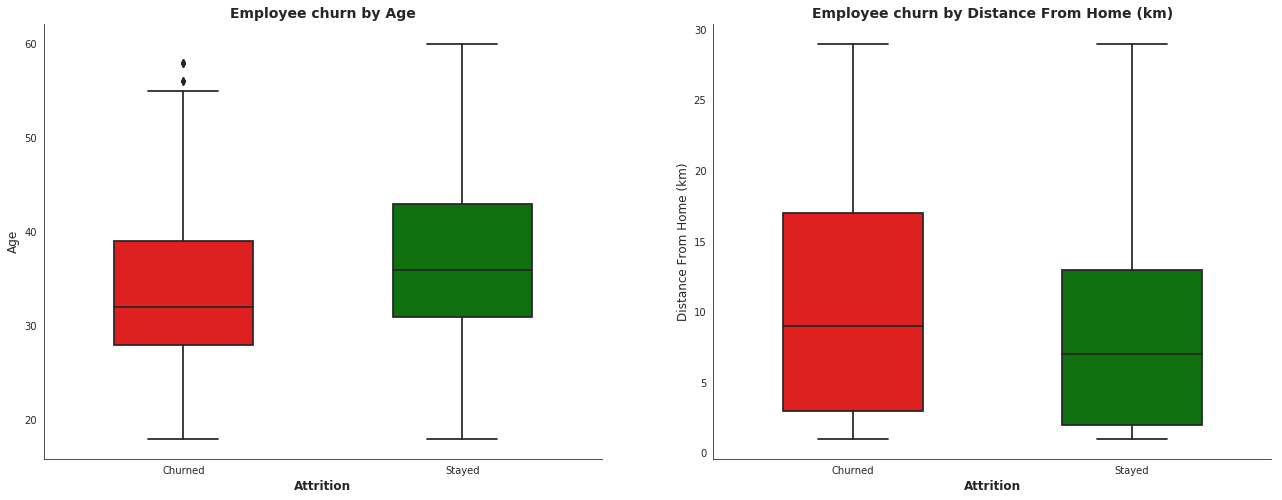

In [8]:
# Set initial plot options
sns.set_style('white')

# Create helper lists
columns_to_plot = ['Age', "DistanceFromHome"]
titles_to_plot = ["Age", "Distance From Home (km)"]

# Create subplots on one row but two columns
fig,axes = plt.subplots(1,2,figsize= (22,8))


# Iterate over each axes, and plot a boxplot with relevant columns/titles
for ax, column, title in zip(axes,columns_to_plot,titles_to_plot):
  # Create a boxplot
  sns.boxplot(x= 'Attrition', y= column,
              data = employee_churn, 
              order= ['Churned','Stayed'],
              width = 0.5,
              linewidth = 1.75,
              palette = ['r','g'],
              ax= ax)

  
  # Despine plot
  sns.despine()
  # Fix final styling for each axes
  ax.set_xlabel('Attrition', fontsize = 12, fontweight='semibold')
  ax.set_ylabel(title,fontsize=12)
  ax.set_title('Employee churn by '+title,fontsize=14,fontweight='semibold')

plt.show()

**Visualize Churn based on Relationship Satisfaction**

Before, plotting I computed the Attritions in `terms of rates as percentages` in relation to each type of relationshipsatisfaction 

As from the plot we can tell that those who churned the most, had a low relationship satisfaction rating.


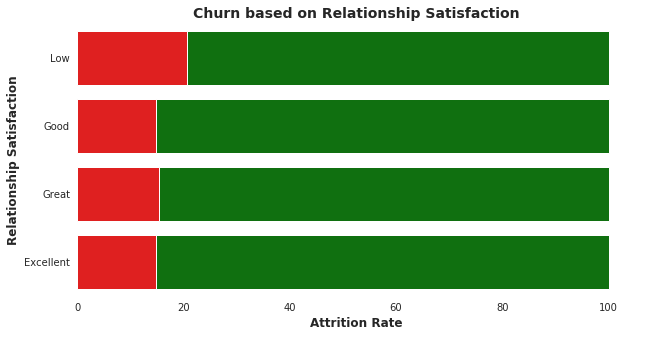

In [9]:
# Compute proportion of RelationshipSatisfaction by Attrition categories
relationship_attrition = pd.crosstab(employee_churn['RelationshipSatisfaction'],employee_churn['Attrition'],normalize='index').reset_index()
# Unify proportions as percentages
relationship_attrition[['Churned','Stayed']] = relationship_attrition[['Churned','Stayed']] * 100
relationship_attrition['Total'] = relationship_attrition['Churned'] + relationship_attrition['Stayed']

# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (10,5))

# Plot the total percentage of employees first (i.e. 100%)
sns.barplot(x= 'Total',y='RelationshipSatisfaction',data = relationship_attrition, order=['Low','Good','Great','Excellent'],color ='g')
# Plot the percentage of employees who churned 
sns.barplot(x= 'Churned',y='RelationshipSatisfaction',data = relationship_attrition, order=['Low','Good','Great','Excellent'],color ='r')

# Despine plot
sns.despine(left=True,bottom=True)

plt.xlabel('Attrition Rate',fontsize=12,fontweight='semibold')
plt.ylabel('Relationship Satisfaction',fontsize=12,fontweight='semibold')
plt.title('Churn based on Relationship Satisfaction',fontsize=14,fontweight='semibold')
plt.show()


In the next figure, I visualized all the **rating surveys replies given by the employees i.e.`EnvironmentSatisfaction, JobSatisfaction, JobInvolvement, WorkLifeBalance` against the Attrition rates** on axes plots similar to the above figure.

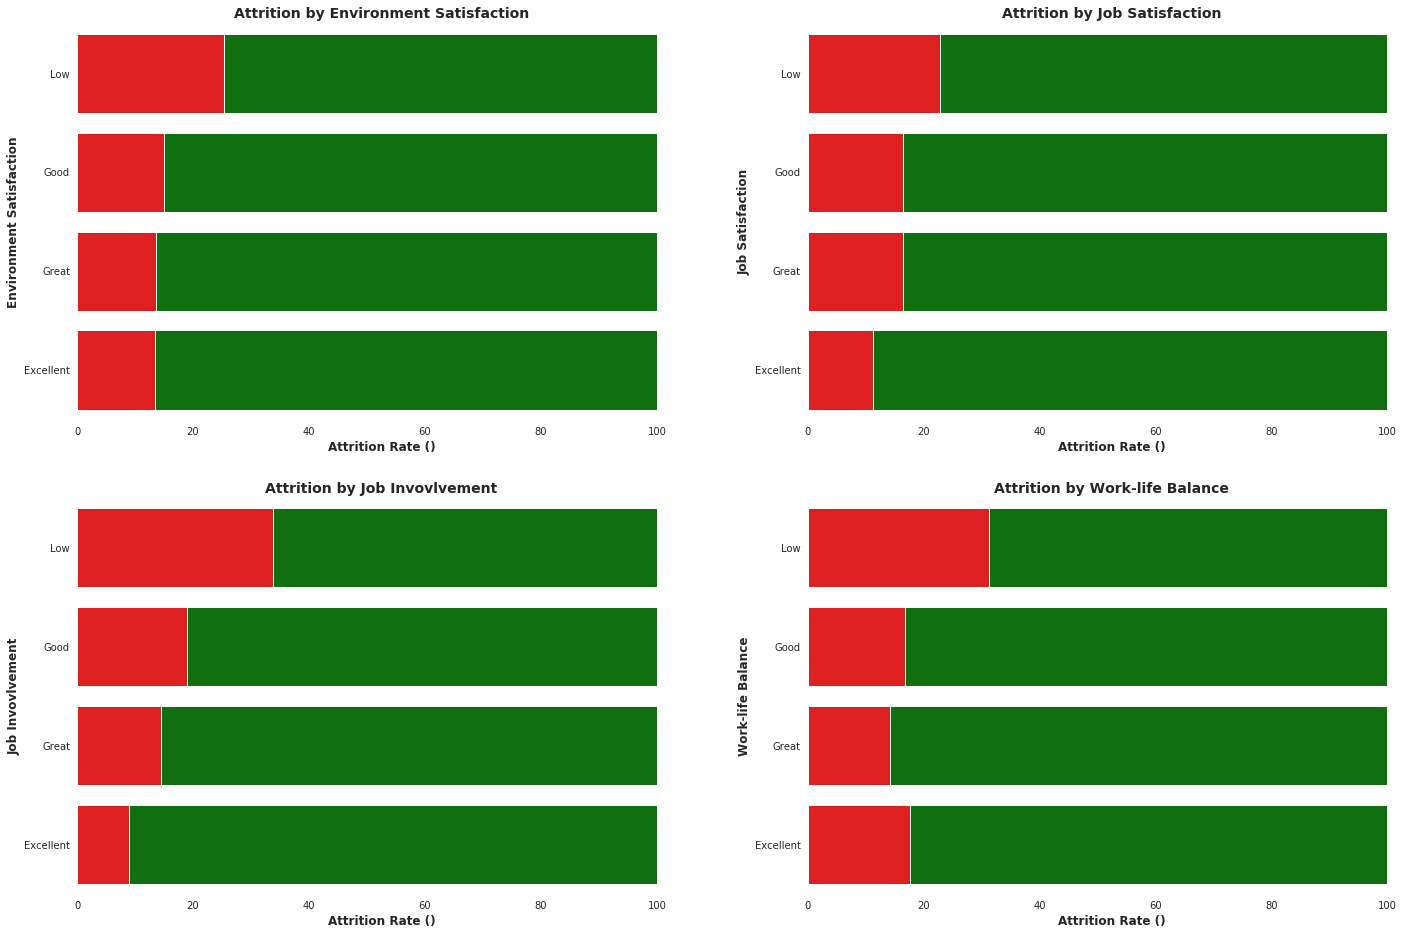

In [10]:
# Set initial plot options
sns.set_style('white')

# Create helper lists
survey_columns = ["EnvironmentSatisfaction", "JobSatisfaction", "JobInvolvement", "WorkLifeBalance"]
survey_titles = ["Environment Satisfaction", "Job Satisfaction", "Job Invovlvement", "Work-life Balance"]

# Create subplots - 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# For every element
for  ax, survey_question,title  in zip(axes.flatten(),survey_columns,survey_titles):

  
  # Cross tabulate data and generate proportions for ecah survey question
  proportions = pd.crosstab(employee_churn[survey_question],
                            employee_churn['Attrition'],
                            normalize='index').reset_index()
  
  # Find percentages instead of proportions
  proportions[['Churned','Stayed']] =  proportions[['Churned','Stayed']] * 100
  
  # Get total column for each survey question
  proportions['Total'] = proportions['Churned'] + proportions['Stayed']
  
  # Plot Total plot
  sns.barplot(x= 'Total',y=survey_question,data =proportions , order=['Low','Good','Great','Excellent'],color ='g',ax=ax)

  # Plot Churned plot
  sns.barplot(x= 'Churned',y=survey_question,data = proportions, order=['Low','Good','Great','Excellent'],color ='r',ax=ax)
  
  # Despine plot
  sns.despine(left= True, bottom= True)
  # Set final formatting
  ax.set_title('Attrition by '+title,fontsize=14,fontweight='semibold')
  ax.set_xlabel('Attrition Rate ()',fontsize=12,fontweight='semibold')
  ax.set_ylabel(title,fontsize=12,fontweight='semibold')

plt.show()


**What can we do to decrease churning?**

Do higher salaries create less churn? Can this be applied to all ages?
To understand this, I used a scatterplot to visualize the relationship between two numeric values, `Age` and `MonthlyIncome`

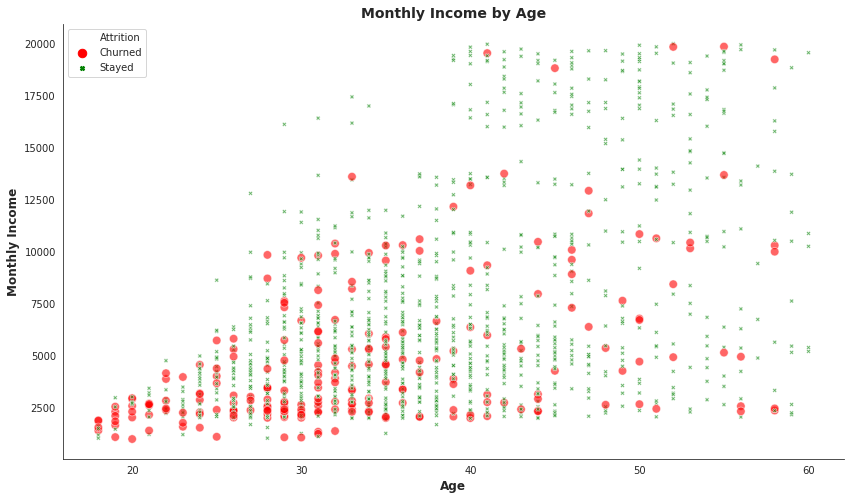

In [11]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (14, 8))

# Create scatterplot
sns.scatterplot(x='Age',y='MonthlyIncome', hue = 'Attrition', 
                data= employee_churn,
                size='Attrition',
                style='Attrition',
                palette=['r','g'],
                alpha = 0.6)
# Despine plot
sns.despine()
# Final formatting touches
plt.xlabel('Age',fontsize=12,fontweight='semibold')
plt.ylabel('Monthly Income',fontsize=12,fontweight='semibold')
plt.title('Monthly Income by Age',fontsize=14,fontweight='semibold')
plt.show()

**Did last year's salary increases impact churn?**

I visualized the relationship between the Monthly Income and the PercentSalaryHike using a `swarmplot`.

A swarmplot are used to show the relationship and distribution of values for one *categorical*, `raise_category` and one *numerical* variable,`MonthlyIncome`.

But first, I segmented and sorted the PercentSalaryHike into a categorical bins named raise_category using the *pandas' method, cut*.



In [12]:
# Create categories for raises
employee_churn['raise_category'] = pd.cut(employee_churn['PercentSalaryHike'], [10, 15, 20, 25], labels = ['10-15%', '15-20%', '20-25%']) 
employee_churn[['raise_category', 'PercentSalaryHike']]

,raise_category,PercentSalaryHike
0,10-15%,11
1,20-25%,23
2,10-15%,15
3,10-15%,11
4,10-15%,12
5,10-15%,13
6,15-20%,20
7,20-25%,22
8,20-25%,21
9,10-15%,13


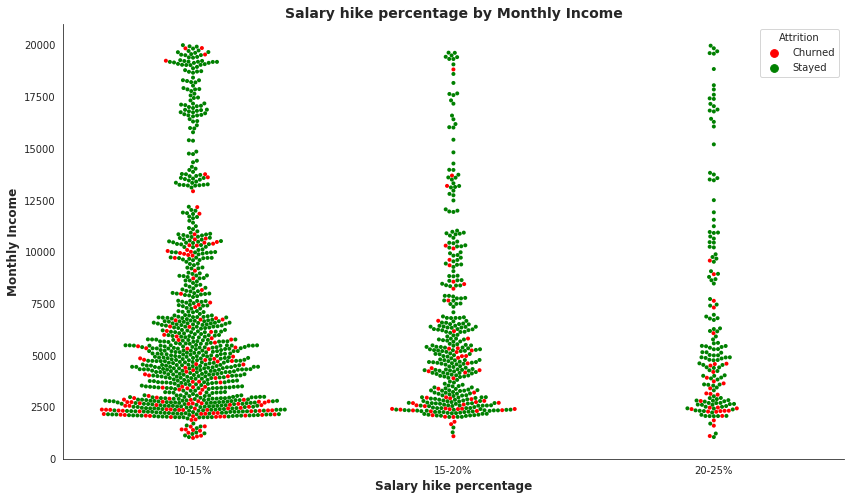

In [13]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (14, 8))

# Create swarmplot
sns.swarmplot(x='raise_category', y='MonthlyIncome', hue= 'Attrition', data = employee_churn, size=4 , palette=['r','g'])

# Despine plot
sns.despine()

plt.xlabel('Salary hike percentage',fontsize=12,fontweight='semibold')
plt.ylabel('Monthly Income',fontsize=12,fontweight='semibold')
plt.title('Salary hike percentage by Monthly Income',fontsize=14,fontweight='semibold')
plt.show()